#**1. Import all important libraries**

In [1]:
from google.colab import drive
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**2. Load the dataset**

In [2]:
df = pd.read_csv("/content/gdrive/MyDrive/Bangkit/dataset_full.csv", index_col=0)
df.head()

,Temperature,Humidity,Precipitation,Wind Speed,Wind Direction,pm10,so2,co,o3,no2
Date,,,,,,,,,,
01-01-2010,28.7,75.0,0.0,4.0,W,60.0,4.0,73.0,27.0,14.0
02-01-2010,28.7,73.0,6.6,2.0,NW,32.0,2.0,16.0,33.0,9.0
03-01-2010,28.8,72.0,0.0,3.0,NE,27.0,2.0,19.0,20.0,9.0
04-01-2010,29.9,70.0,0.0,2.0,SE,22.0,2.0,16.0,15.0,6.0
05-01-2010,28.5,70.0,0.4,3.0,E,25.0,2.0,17.0,15.0,8.0


In [3]:
df.describe()

,Temperature,Humidity,Precipitation,Wind Speed,pm10,so2,co,o3,no2
count,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,28.502605,75.862224,5.775355,1.858968,65.738793,25.214573,34.220441,95.434510,16.711746
std,1.029102,6.179885,16.303588,0.867262,19.315612,11.288574,15.865021,48.153567,5.562103
min,24.100000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.900000,72.000000,0.000000,1.000000,54.000000,17.000000,24.000000,63.000000,13.000000
50%,28.600000,76.000000,0.000000,2.000000,65.000000,25.000000,31.000000,86.000000,16.000000
75%,29.200000,80.000000,3.500000,2.000000,76.000000,31.000000,39.000000,119.000000,20.000000
max,34.300000,96.000000,277.500000,5.000000,178.000000,72.000000,162.000000,314.000000,63.000000


#**3. Visualize numerical attributes**

##A. Line graph
We can see the pattern of the number of pollutants every year.

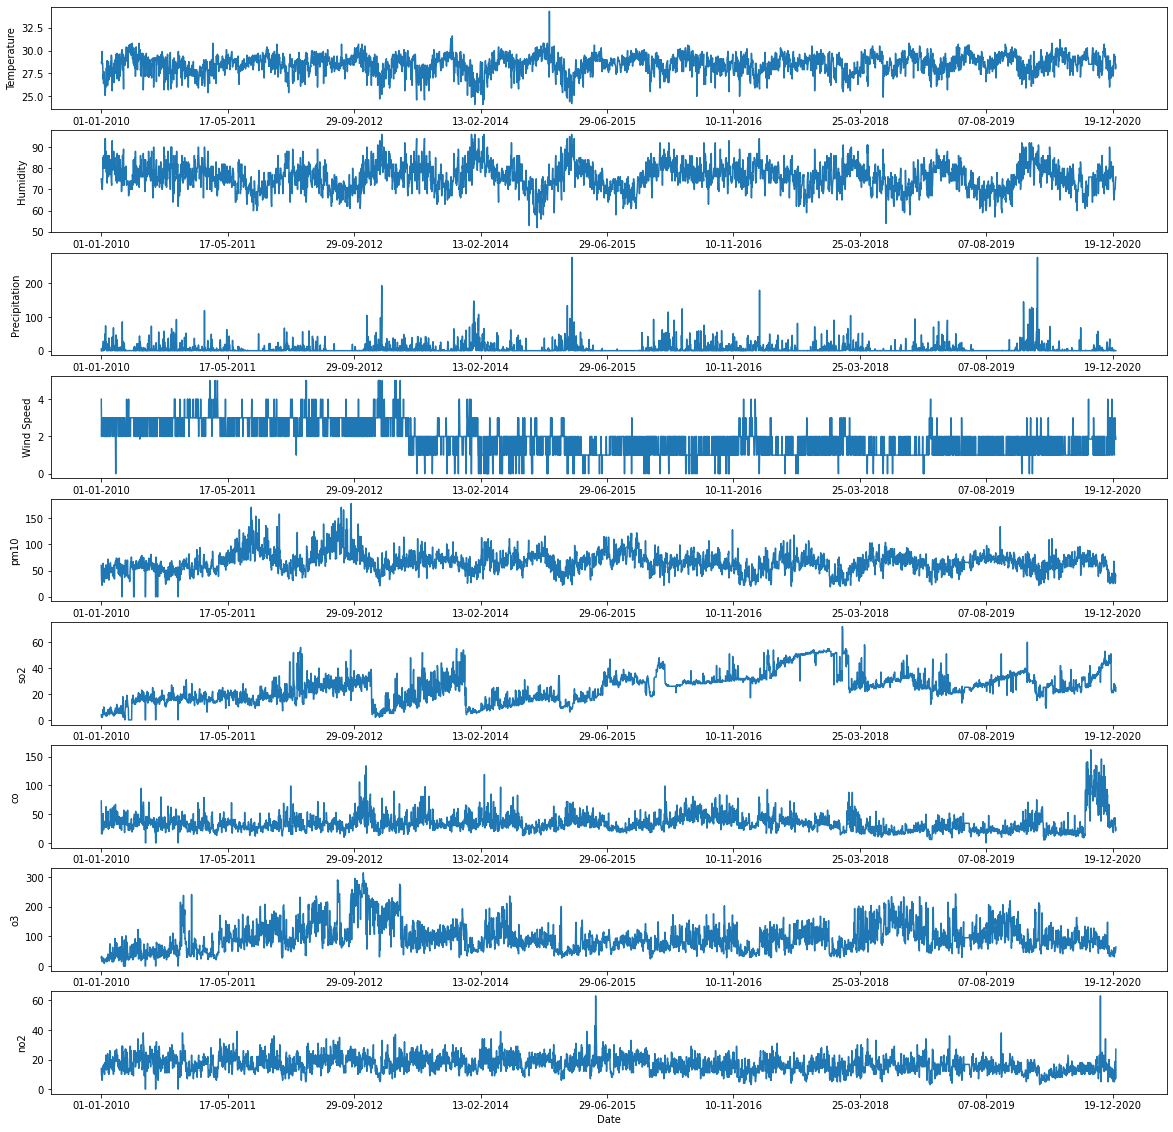

In [4]:
df_num = df.select_dtypes(np.number)

plt.figure(figsize=(20, 20))
i = 1

for column in df_num.columns:
  plt.subplot(len(df_num.columns), 1, i)
  ax = df[column].plot()
  ax.set_ylabel(column)
  i += 1

plt.show()

##B. Correlation matrix and heatmap

With correlation matrix, we can see the correlation of each attribute. The closer the value to 0, the less linear correlation between two attributes.

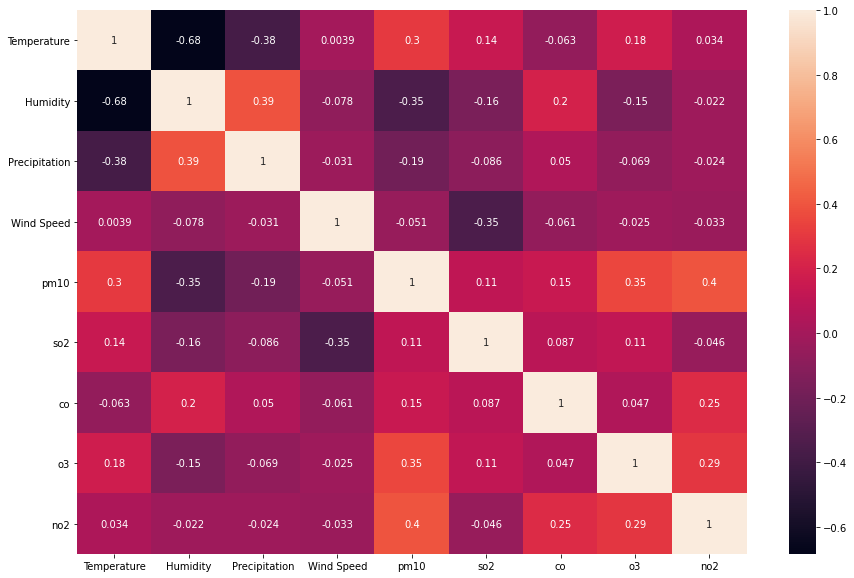

In [5]:
df_corr = df_num.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)
plt.show()

##C. Box plot

Here, we can easily see the median, range, and outlier of each pollutant every year.

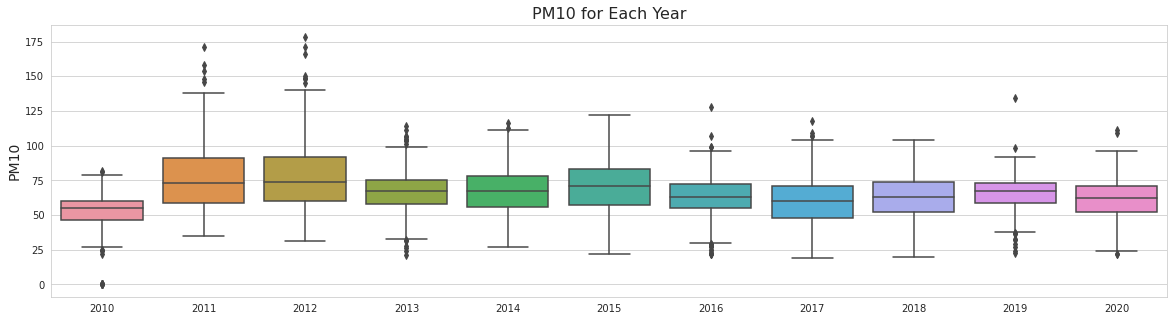

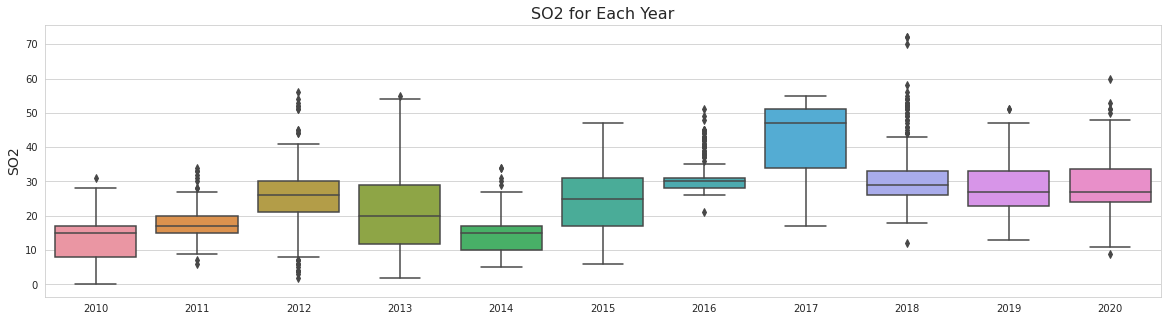

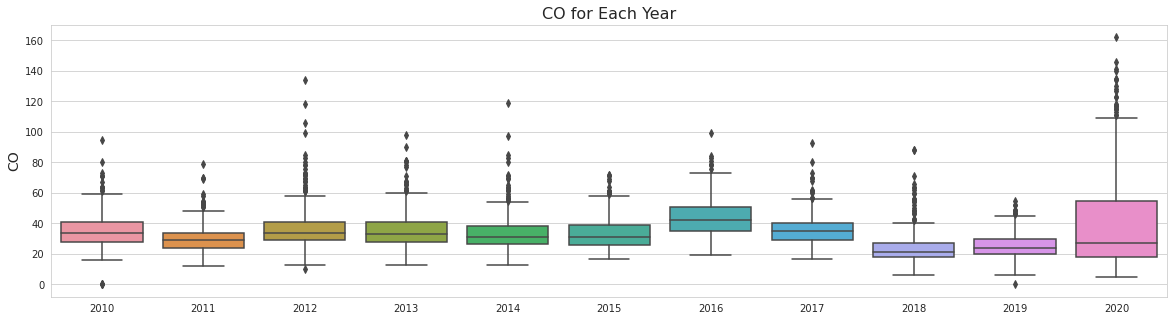

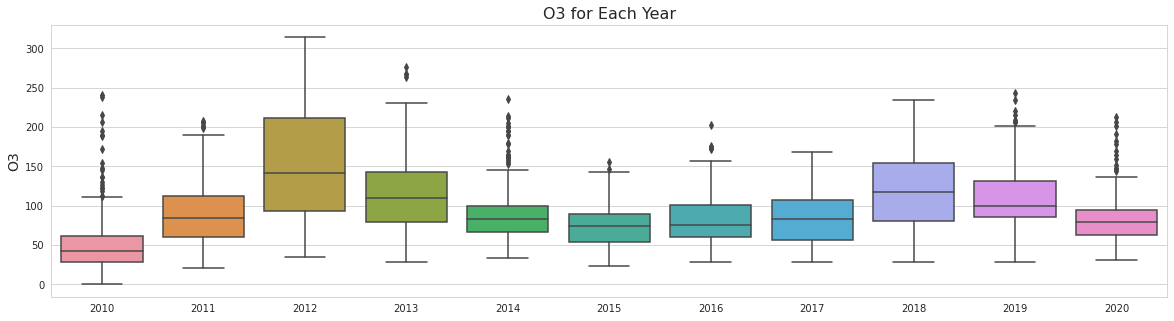

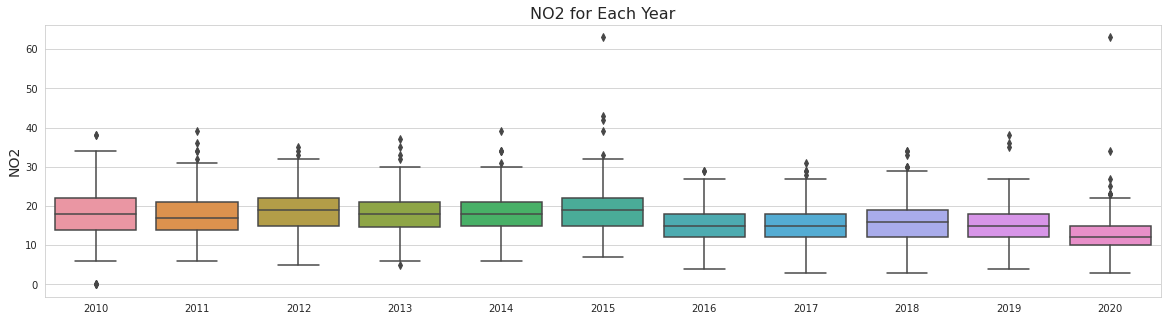

In [6]:
df2 = df.copy()
year = [i[-4:] for i in df2.index]
df2['year'] = pd.Series(year, index=df2.index)

sns.set_style('whitegrid')

for pollutant in df.columns[-5:]:
  plt.figure(figsize=(20, 5))
  ax = sns.boxplot(x='year', y=pollutant, data=df2)
  ax.set_xlabel('')
  ax.set_ylabel(pollutant.upper(), fontsize=14)
  ax.set_title("{} for Each Year".format(pollutant.upper()), fontsize=16)

plt.show()

#**4. Visualize Categorical Attribute**

Firstly, we need to ensure each category does not have extra space

In [7]:
df['Wind Direction'] = df['Wind Direction'].apply(lambda x: x.strip())
df['Wind Direction'].value_counts()

N     1552
W      709
C      655
E      556
NW     212
NE     129
SW      86
S       76
SE      38
Name: Wind Direction, dtype: int64

After that, we visualize the distribution with bar chart

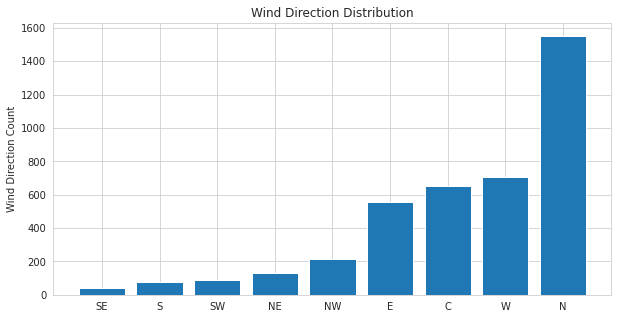

In [8]:
df_wind_dir = df["Wind Direction"].value_counts().sort_values()

x_coords = np.arange(len(df_wind_dir))

plt.figure(figsize=(10, 5))
plt.bar(x_coords, df_wind_dir.values, tick_label=df_wind_dir.index)
plt.ylabel('Wind Direction Count')
plt.title("Wind Direction Distribution")
plt.show()